PRE PROCESSING

In [ ]:
#HI

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


PRE PROCESS

load

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Take a first look at the data
print(df.head())

# Check basic information about the dataset
print(df.info())
print(df.describe())

# Check for the number of unique values in each column
print(df.nunique())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

missing values

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Load the dataset
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Calculate missing values
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

# Create a DataFrame for visualization
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percent
})

# Filter to only show columns with missing values
missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values('Percentage', ascending=False)

# If there are missing values, create visualizations
if not missing_df.empty:
    # Create a more informative bar chart
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=missing_df.index, y='Percentage', data=missing_df, palette='viridis')
    plt.title('Percentage of Missing Values by Feature', fontsize=16)
    plt.xlabel('Features', fontsize=14)
    plt.ylabel('Missing Percentage (%)', fontsize=14)
    plt.xticks(rotation=45, ha='right')

    # Add exact percentages on top of bars
    for i, p in enumerate(ax.patches):
        ax.annotate(f'{p.get_height():.2f}%',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'bottom',
                   fontsize=11)

    plt.tight_layout()
    plt.show()

    # Matrix visualization (better visual pattern recognition)
    plt.figure(figsize=(12, 8))
    msno.matrix(df)
    plt.title('Missing Value Matrix (White spaces indicate missing values)', fontsize=16)
    plt.show()

    # Heatmap visualization (shows correlations between missing values)
    plt.figure(figsize=(12, 10))
    msno.heatmap(df)
    plt.title('Correlation Heatmap of Missing Values', fontsize=16)
    plt.show()
else:
    print("Great news! There are no missing values in the dataset.")

Great news! There are no missing values in the dataset.


explore churn variable

Churn
No     5174
Yes    1869
Name: count, dtype: int64
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


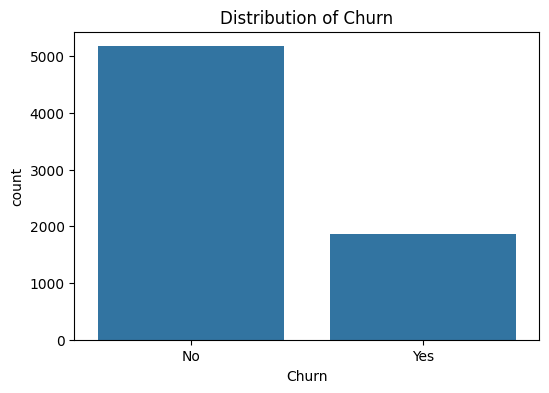

In [ ]:
# Check class distribution of the target variable
print(df['Churn'].value_counts())
print(df['Churn'].value_counts(normalize=True))

# Visualize the distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn')
plt.show()

explore categorical data

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


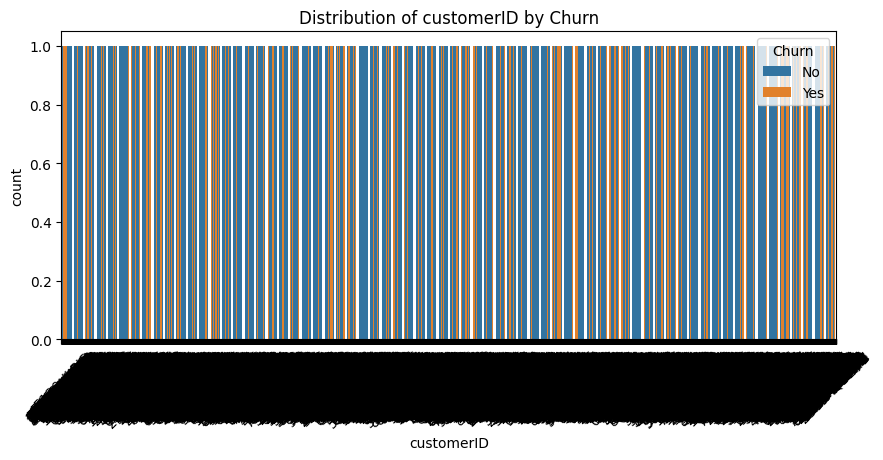

customerID: Chi2 = 7043.0, p-value = 0.49439767459438705


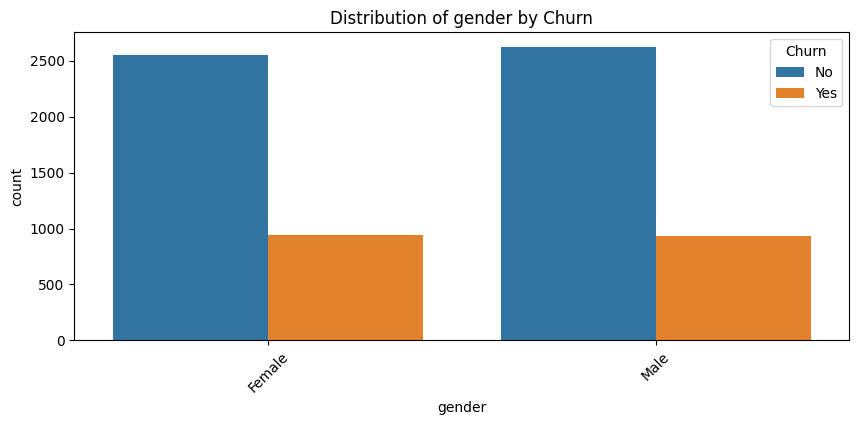

gender: Chi2 = 0.4840828822091383, p-value = 0.48657873605618596


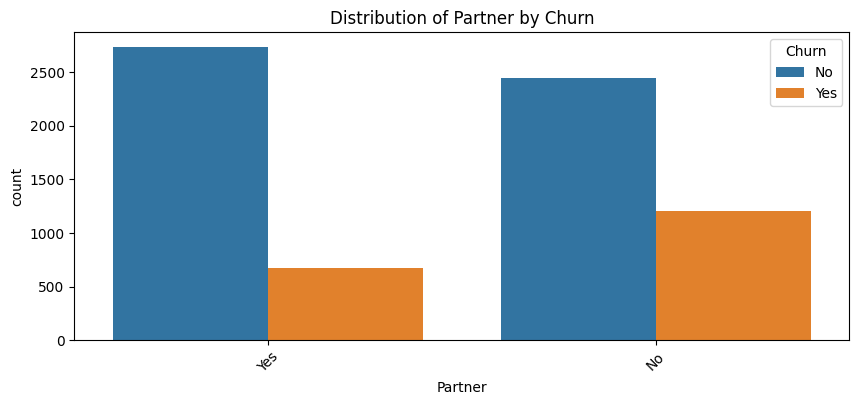

Partner: Chi2 = 158.7333820309922, p-value = 2.1399113440759935e-36


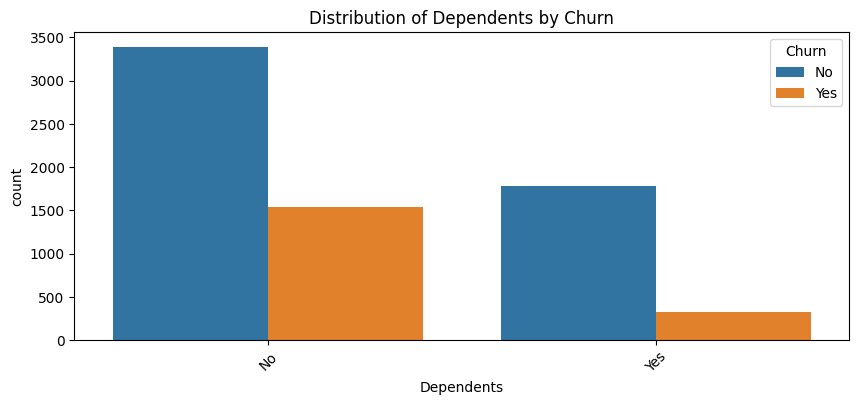

Dependents: Chi2 = 189.12924940423474, p-value = 4.9249216612154196e-43


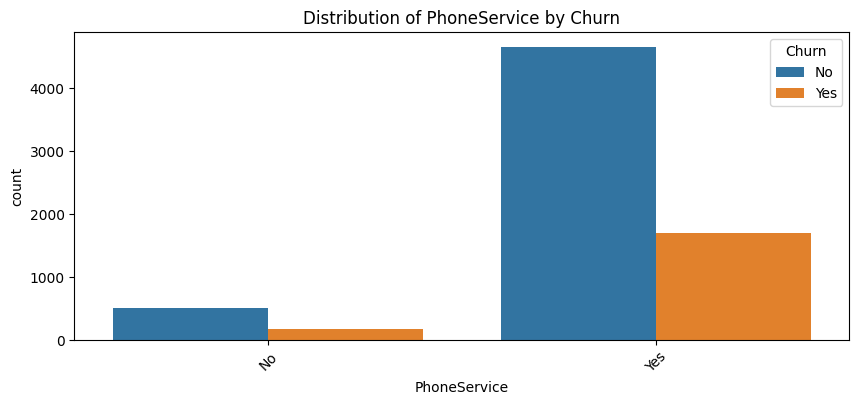

PhoneService: Chi2 = 0.9150329892546948, p-value = 0.3387825358066928


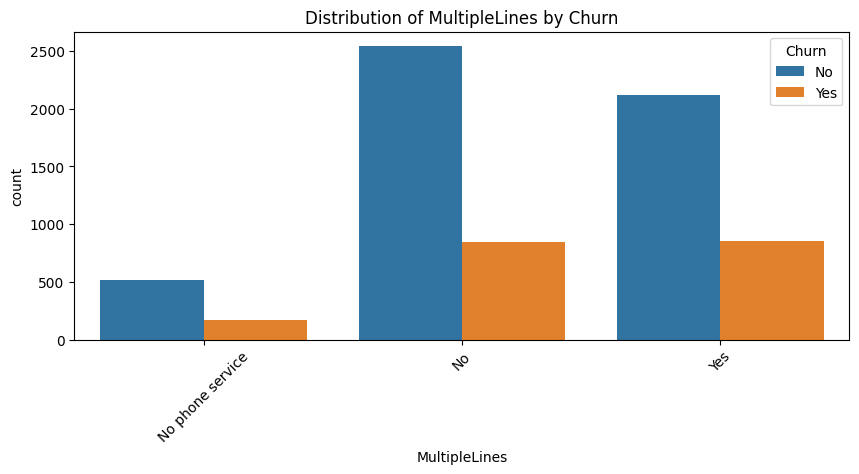

MultipleLines: Chi2 = 11.33044148319756, p-value = 0.0034643829548773


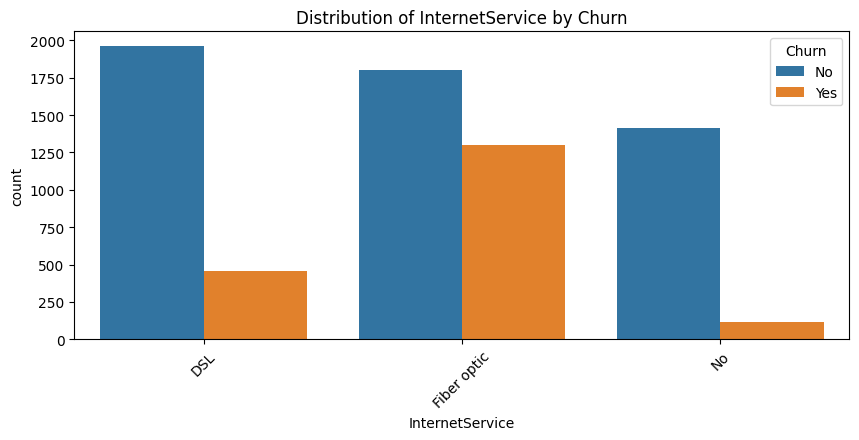

InternetService: Chi2 = 732.309589667794, p-value = 9.571788222840544e-160


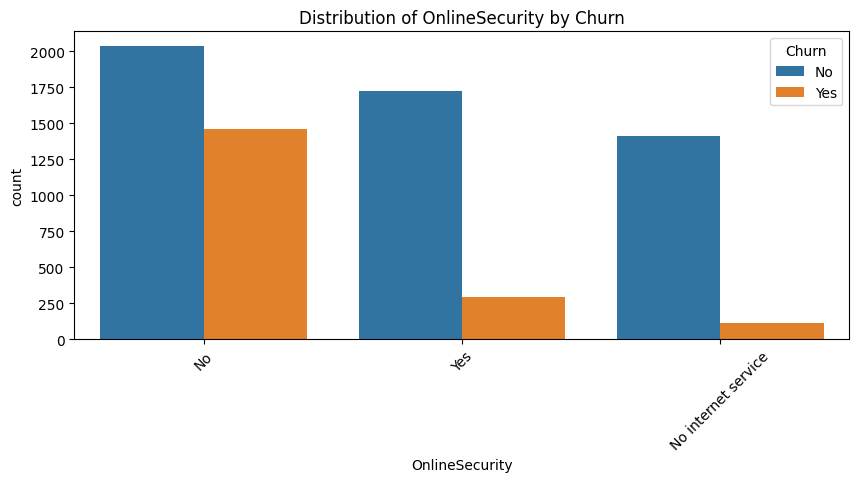

OnlineSecurity: Chi2 = 849.9989679615965, p-value = 2.661149635176552e-185


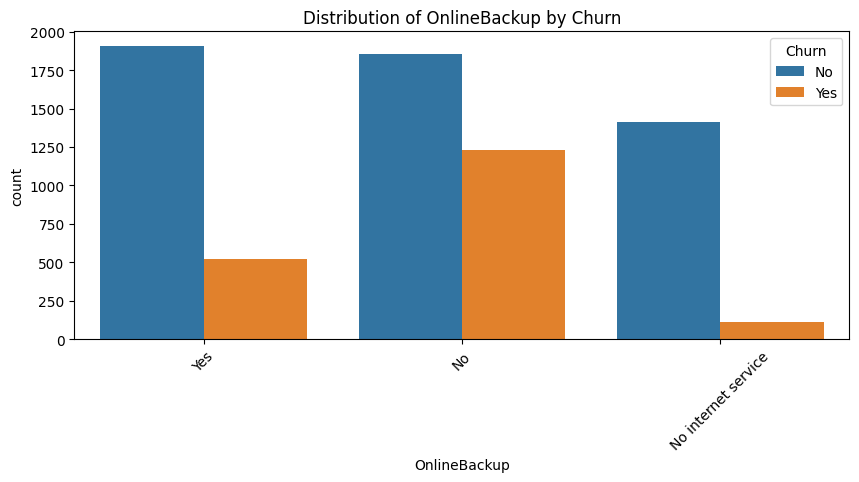

OnlineBackup: Chi2 = 601.812790113409, p-value = 2.0797592160864276e-131


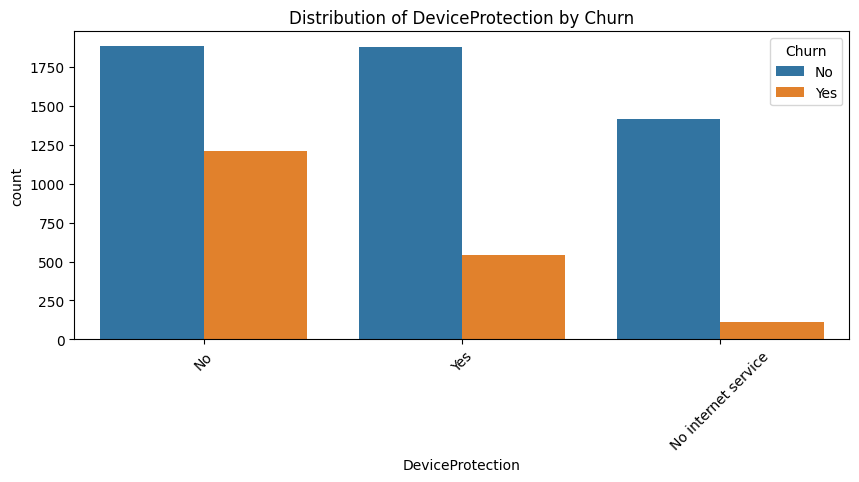

DeviceProtection: Chi2 = 558.419369407389, p-value = 5.505219496457244e-122


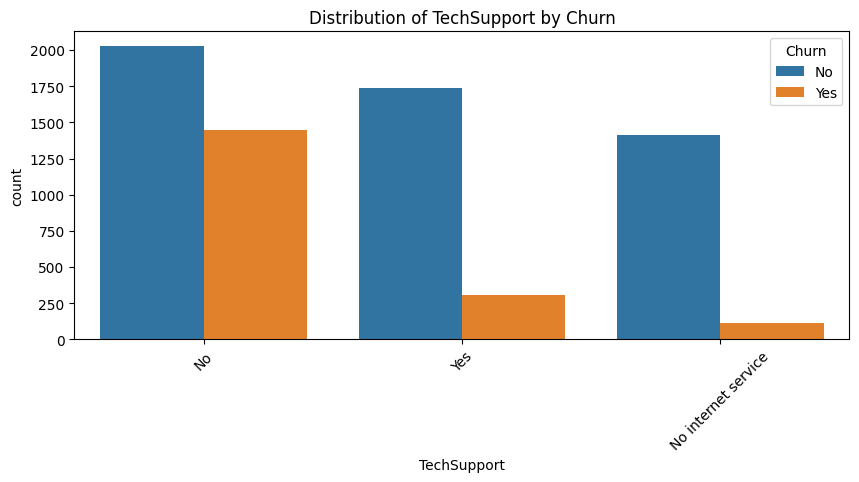

TechSupport: Chi2 = 828.1970684587394, p-value = 1.4430840279998987e-180


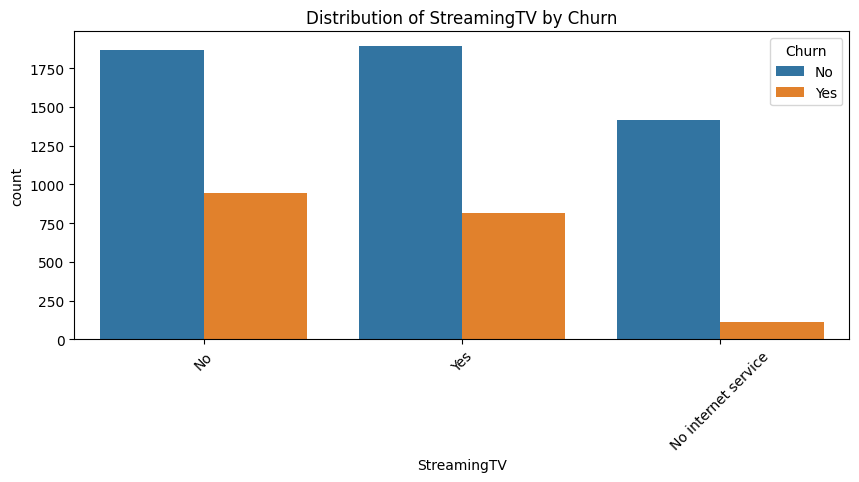

StreamingTV: Chi2 = 374.2039433109813, p-value = 5.528994485739183e-82


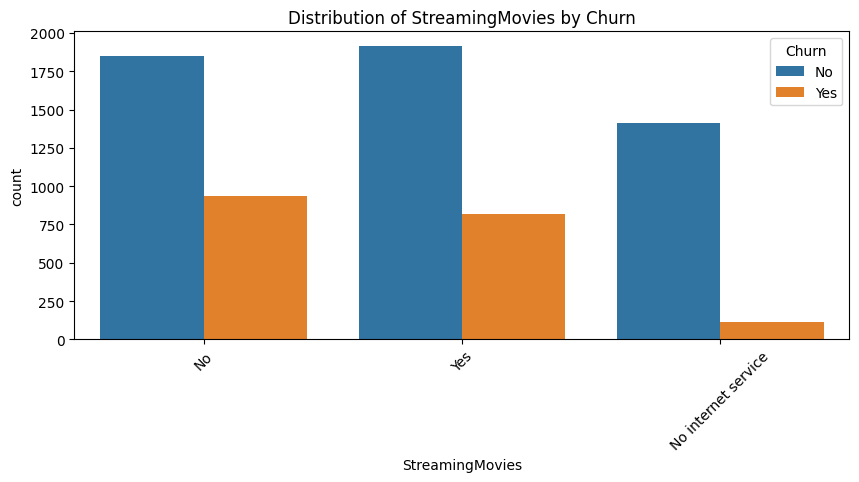

StreamingMovies: Chi2 = 375.6614793452656, p-value = 2.667756755723681e-82


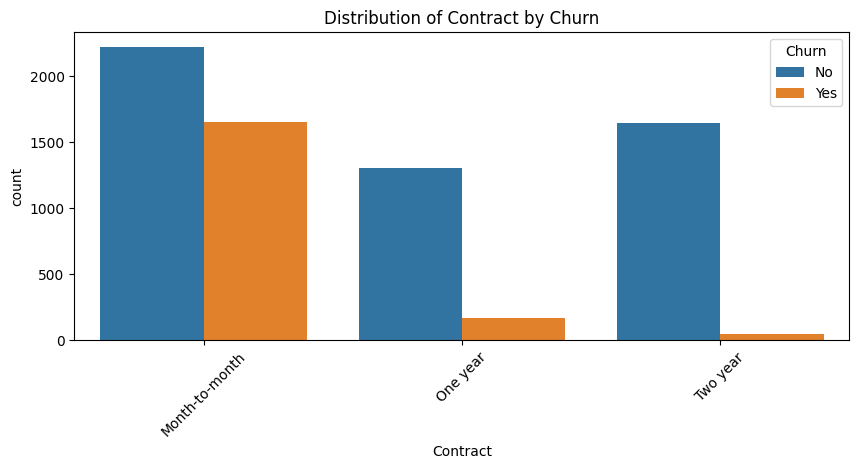

Contract: Chi2 = 1184.5965720837926, p-value = 5.863038300673391e-258


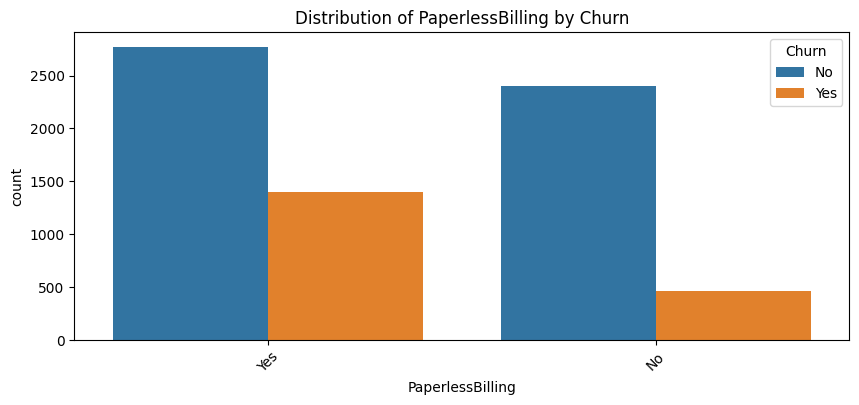

PaperlessBilling: Chi2 = 258.27764906707307, p-value = 4.073354668665985e-58


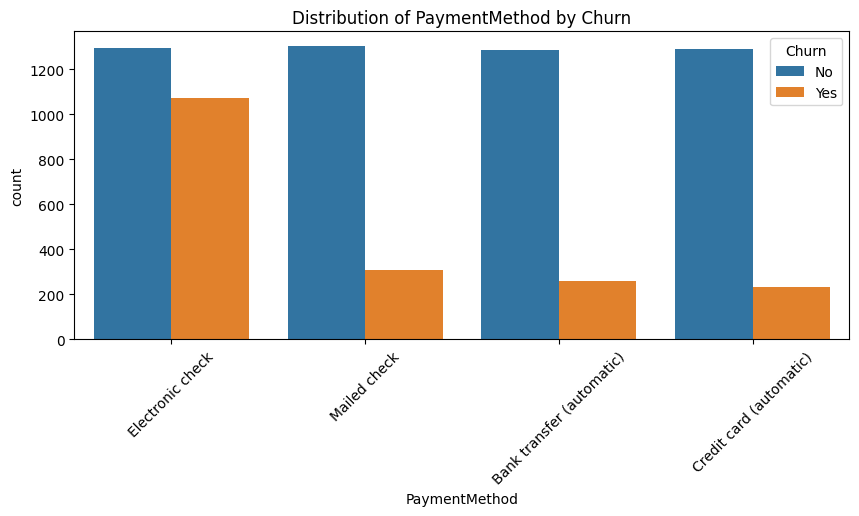

PaymentMethod: Chi2 = 648.1423274814, p-value = 3.6823546520097993e-140


In [ ]:
# List all categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Plot relationship between categorical variables and churn
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'Distribution of {col} by Churn')
    plt.xticks(rotation=45)
    plt.show()

    # Chi-square test for association with churn
    from scipy.stats import chi2_contingency
    contingency_table = pd.crosstab(df[col], df['Churn'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"{col}: Chi2 = {chi2}, p-value = {p}")

**Feature Engineering & Sentiment Analysis**

In [ ]:
import pandas as pd
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")  # Replace with actual filename
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
print(df.columns)


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [ ]:
df["tenure_group"] = pd.cut(df["tenure"], bins=[0, 12, 24, 36, 48, 60, 72],
                            labels=["0-12", "12-24", "24-36", "36-48", "48-60", "60+"])


In [ ]:



# Convert TotalCharges to numeric and handle errors
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Avoid division by zero in tenure
df["tenure"] = df["tenure"].replace(0, 1)

# Feature 1: Average Monthly Spend
df["avg_monthly_spend"] = df["TotalCharges"] / df["tenure"]
df["avg_monthly_spend"].fillna(0, inplace=True)

# Feature 2: Tenure in Years
df["tenure_years"] = df["tenure"] / 12

# Feature 3: Family Status (Has Partner & Dependents)
df["family_status"] = df["Partner"].map({"Yes": 1, "No": 0}) + df["Dependents"].map({"Yes": 1, "No": 0})

# Feature 4: Annual Spend
df["annual_spend"] = df["MonthlyCharges"] * 12

# Feature 5: Payment Consistency (Ratio of Total Charges to Expected Charges)
df["payment_consistency"] = df["TotalCharges"] / (df["MonthlyCharges"] * df["tenure"])
df["payment_consistency"].fillna(0, inplace=True)

# Feature 6: Short-Term Contract Risk (Month-to-Month contracts)
df["short_contract_risk"] = df["Contract"].apply(lambda x: 1 if x == "Month-to-month" else 0)

# Feature 7: Paperless Billing Risk
df["paperless_risk"] = df["PaperlessBilling"].map({"Yes": 1, "No": 0})

# Feature 8: Number of Services Used
service_cols = ["PhoneService", "MultipleLines", "InternetService",
                "OnlineSecurity", "OnlineBackup", "DeviceProtection",
                "TechSupport", "StreamingTV", "StreamingMovies"]
df["total_services"] = df[service_cols].apply(lambda x: sum(x == "Yes"), axis=1)

# Feature 9: Premium Services Usage
premium_services = ["OnlineSecurity", "TechSupport", "StreamingTV", "StreamingMovies"]
df["premium_service_usage"] = df[premium_services].apply(lambda x: sum(x == "Yes"), axis=1)

# Save the enhanced dataset
df.to_csv("enhanced_telecom_data.csv", index=False)

# Display the first few rows
df.head()


<ipython-input-17-c1cd62fe2f71>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["avg_monthly_spend"].fillna(0, inplace=True)
<ipython-input-17-c1cd62fe2f71>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,tenure_group,avg_monthly_spend,tenure_years,family_status,annual_spend,payment_consistency,short_contract_risk,paperless_risk,total_services,premium_service_usage
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,0-12,29.850000,0.083333,1,358.2,1.000000,1,1,1,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,24-36,55.573529,2.833333,0,683.4,0.975830,0,0,3,1
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,0-12,54.075000,0.166667,0,646.2,1.004178,1,1,3,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,36-48,40.905556,3.750000,0,507.6,0.967034,0,0,3,2
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,0-12,75.825000,0.166667,0,848.4,1.072489,1,1,1,0


In [ ]:
df.to_csv("processed_telecom_data.csv", index=False)


Exploratory Data Analysis (EDA)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
missing_values = df.isnull().sum()
missing_values[missing_values > 0]


,0
TotalCharges,11
tenure_group,11


Data Visualization for Insights

<ipython-input-20-1a8ca02bb1f3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Churn"], palette="coolwarm")


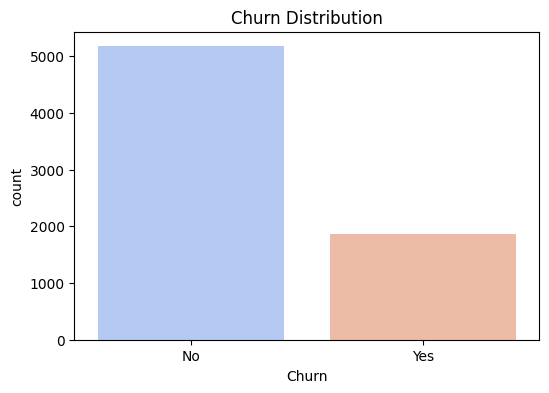

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Churn"], palette="coolwarm")
plt.title("Churn Distribution")
plt.show()


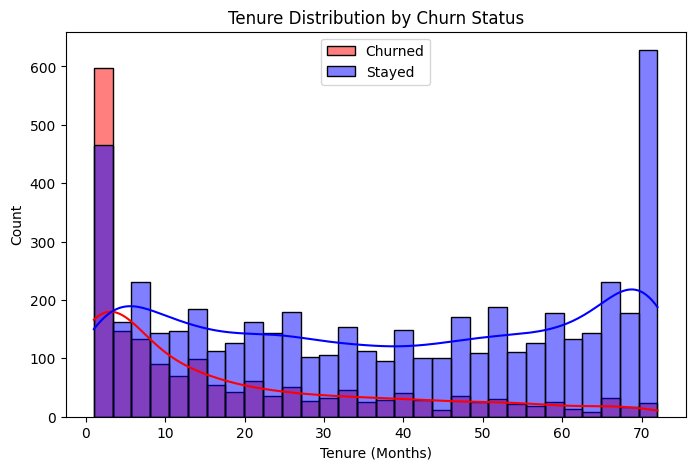

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df[df["Churn"] == "Yes"]["tenure"], bins=30, color="red", label="Churned", kde=True)
sns.histplot(df[df["Churn"] == "No"]["tenure"], bins=30, color="blue", label="Stayed", kde=True)
plt.legend()
plt.title("Tenure Distribution by Churn Status")
plt.xlabel("Tenure (Months)")
plt.show()


<ipython-input-22-947c9355d53e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="MonthlyCharges", data=df, palette="coolwarm")


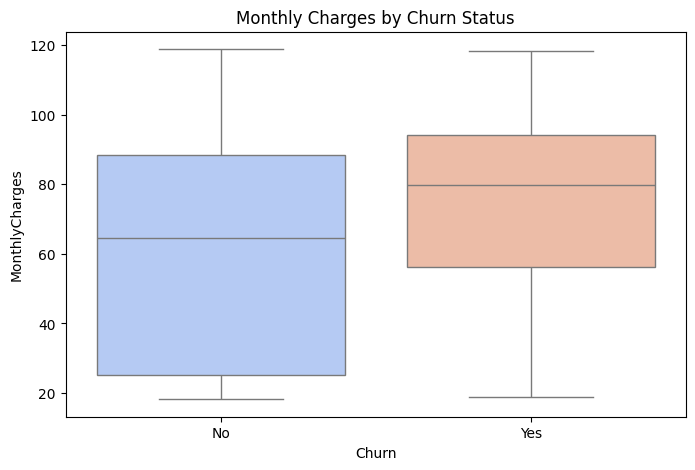

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Churn", y="MonthlyCharges", data=df, palette="coolwarm")
plt.title("Monthly Charges by Churn Status")
plt.show()


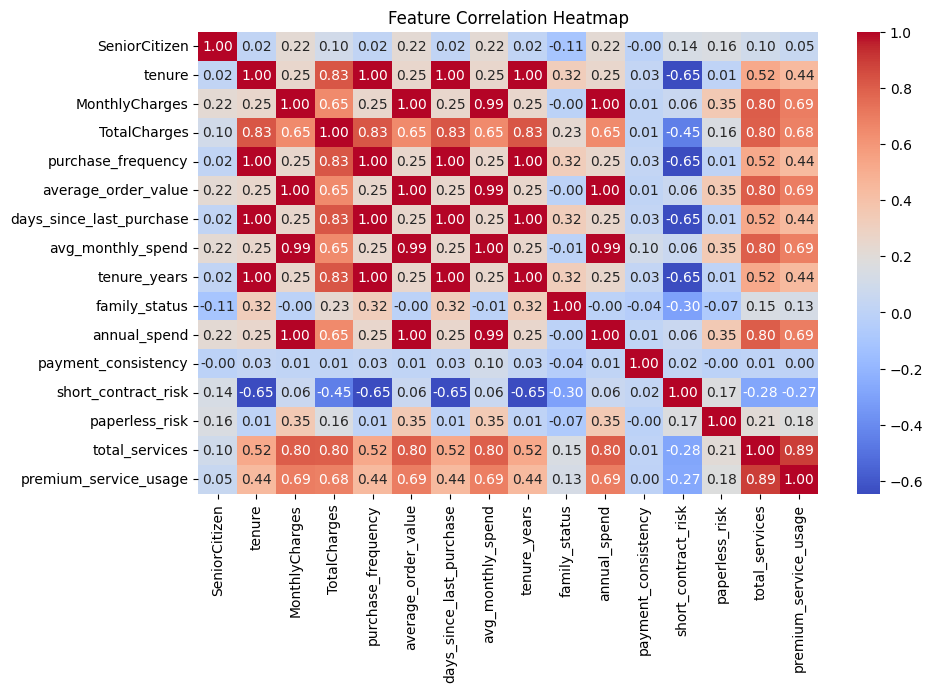

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=["number"])

# Generate the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

Feature Engineering & Data Preparation for Deep Learning

In [ ]:
import pandas as pd

# Load the saved enhanced dataset
df = pd.read_csv("/content/processed_telecom_data.csv")  # Use correct path


FileNotFoundError: [Errno 2] No such file or directory: '/content/processed_telecom_data.csv'

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for binary categorical features
binary_features = ["gender", "Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn"]
for feature in binary_features:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])

# One-Hot Encoding for categorical features with multiple values
df = pd.get_dummies(df, columns=["InternetService", "Contract", "PaymentMethod"], drop_first=True)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_features = ["tenure", "MonthlyCharges", "TotalCharges", "avg_monthly_spend"]
df[num_features] = scaler.fit_transform(df[num_features])


In [ ]:
df.to_csv("final_telecom_data.csv", index=False)


Enhanced Deep Learning Model Training & Evaluation

In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Step 2: Load Processed Data
df = pd.read_csv("/content/final_telecom_data.csv")

In [ ]:
# Step 3: Prepare Features & Labels
X = df.drop(columns=["customerID", "Churn"])  # Drop non-numeric and target column
y = df["Churn"].map({"Yes": 1, "No": 0})  # Convert Churn to binary values (1/0)

In [ ]:
# Step 4: Split into Train & Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=["object"]).columns

# Apply Label Encoding to categorical columns
label_enc = LabelEncoder()
for col in categorical_cols:
    X_train[col] = label_enc.fit_transform(X_train[col])
    X_test[col] = label_enc.transform(X_test[col])  # Use same encoding for test set

# Apply StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
model = Sequential([
    Dense(128, activation="relu", input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(64, activation="relu"),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation="relu"),
    BatchNormalization(),
    Dropout(0.2),

    Dense(1, activation="sigmoid")  # Sigmoid for binary classification
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Step 7: Compile the Model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss="binary_crossentropy",
              metrics=["accuracy"])


In [ ]:
# Step 8: Define Callbacks for Optimization
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint("best_model.h5", save_best_only=True, monitor="val_loss")
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=1e-5)

callbacks = [early_stopping, model_checkpoint, reduce_lr]

In [ ]:
print(y_train.value_counts())  # Check class distribution
print(y_train.unique())  # Ensure proper encoding (should be 0/1 for binary classification)


Series([], Name: count, dtype: int64)
[nan]


In [ ]:
print(y_train.isna().sum())  # Count NaNs
print(y_train.shape)  # Check shape


5634
(5634,)


In [ ]:
import pandas as pd

# Load the saved CSV file
telecom_data = pd.read_csv("final_telecom_data.csv")  # Replace with actual file path

print(telecom_data.head())  # Check if the data is loaded correctly


   customerID  gender  SeniorCitizen  Partner  Dependents    tenure  \
0  7590-VHVEG       0              0        1           0  0.000000   
1  5575-GNVDE       1              0        0           0  0.464789   
2  3668-QPYBK       1              0        0           0  0.014085   
3  7795-CFOCW       1              0        0           0  0.619718   
4  9237-HQITU       0              0        0           0  0.014085   

   PhoneService     MultipleLines OnlineSecurity OnlineBackup  ...  \
0             0  No phone service             No          Yes  ...   
1             1                No            Yes           No  ...   
2             1                No            Yes          Yes  ...   
3             0  No phone service            Yes           No  ...   
4             1                No             No           No  ...   

  paperless_risk total_services premium_service_usage  \
0              1              1                     0   
1              0              3       

In [ ]:
print(telecom_data.columns)  # See all column names


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'purchase_frequency', 'average_order_value',
       'days_since_last_purchase', 'tenure_group', 'avg_monthly_spend',
       'tenure_years', 'family_status', 'annual_spend', 'payment_consistency',
       'short_contract_risk', 'paperless_risk', 'total_services',
       'premium_service_usage', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


In [ ]:
print(telecom_data["Churn"].isna().sum())  # Count missing values
print(telecom_data["Churn"].unique())  # See unique values


0
[0 1]


In [ ]:
telecom_data = telecom_data.dropna(subset=["Churn"])  # Remove missing values
# OR
telecom_data["Churn"].fillna("No", inplace=True)  # Fill with "No" if needed

# Convert Yes/No to 1/0
y_train = telecom_data["Churn"].map({"Yes": 1, "No": 0})
y_test = telecom_data["Churn"].map({"Yes": 1, "No": 0})

print(y_train.value_counts())  # Check distribution


Series([], Name: count, dtype: int64)


<ipython-input-46-67a47bf2799c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  telecom_data["Churn"].fillna("No", inplace=True)  # Fill with "No" if needed


In [ ]:
import numpy as np

y_train = np.array(y_train)  # Convert y_train to a NumPy array
y_test = np.array(y_test)  # Convert y_test to a NumPy array

print(X_train.shape, y_train.shape)  # Should have same number of rows


(5634, 36) (7043,)


In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(5634, 36) (7043,)
(1409, 36) (7043,)


In [ ]:
from sklearn.model_selection import train_test_split

# Ensure y is correctly extracted before splitting
y = telecom_data["Churn"].values  # Get Churn as NumPy array
X = telecom_data.drop(columns=["Churn"])  # Drop target column

# Split again properly
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # Ensure balanced classes
)

# Confirm shapes match
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(5634, 37) (5634,)
(1409, 37) (1409,)


In [ ]:
import pandas as pd

# Load the preprocessed dataset (replace with correct path)
df = pd.read_csv("/content/final_telecom_data.csv")

# Ensure no missing values in target column
df = df.dropna(subset=["Churn"])

# Encode categorical target variable
label_enc = LabelEncoder()
df["Churn"] = label_enc.fit_transform(df["Churn"])  # Convert Yes/No to 1/0


In [ ]:
# Define features (X) and target variable (y)
X = df.drop(columns=["Churn"])
y = df["Churn"]

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(5634, 37) (5634,)
(1409, 37) (1409,)


In [ ]:
# Standardize numeric data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


ValueError: could not convert string to float: '4950-BDEUX'

In [ ]:
# Identify categorical columns (object type)
categorical_cols = X_train.select_dtypes(include=["object"]).columns
print("Categorical Columns:", categorical_cols)


Categorical Columns: Index(['customerID', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'tenure_group'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=["object"]).columns
print("Categorical Columns:", categorical_cols)

# Apply Label Encoding while handling unseen labels
for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])  # Fit & transform on train
    X_test[col] = X_test[col].map(lambda s: le.transform([s])[0] if s in le.classes_ else -1)  # Map unseen labels to -1


Categorical Columns: Index(['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'tenure_group'],
      dtype='object')


In [ ]:
print(X_test.dtypes)  # Check column data types
print(X_test.select_dtypes(include=["object"]).columns)  # Identify non-numeric columns


customerID                                object
gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                   float64
PhoneService                               int64
MultipleLines                              int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
purchase_frequency                         int64
average_order_value                      float64
days_since_last_purchase                   int64
tenure_group        

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=["object"]).columns

# Apply Label Encoding properly
for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col].astype(str))  # Convert all to string before encoding
    X_test[col] = X_test[col].map(lambda s: le.transform([s])[0] if s in le.classes_ else -1)  # Handle unseen values


In [ ]:
from sklearn.preprocessing import StandardScaler

# Ensure only numeric columns are scaled
numeric_cols = X_train.select_dtypes(include=["number"]).columns

scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

print("Scaling applied successfully!")


ValueError: could not convert string to float: '4376-KFVRS'

In [62]:
print(X_test.select_dtypes(include=["object"]).columns)  # Find non-numeric columns
print(X_test.dtypes)  # Check data types


Index(['customerID'], dtype='object')
customerID                                object
gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                   float64
PhoneService                               int64
MultipleLines                              int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
purchase_frequency                         int64
average_order_value                      float64
days_since_last_purchase       

In [63]:
# Drop customerID from both training and test sets
X_train = X_train.drop(columns=["customerID"])
X_test = X_test.drop(columns=["customerID"])

# Apply StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("✅ Scaling applied successfully!")



✅ Scaling applied successfully!


In [65]:
import numpy as np

# ✅ 1. Check for Missing Values (Fixed for NumPy)
print("Missing values in X_train:", np.isnan(X_train).sum())
print("Missing values in X_test:", np.isnan(X_test).sum())
print("Missing values in y_train:", np.isnan(y_train).sum())
print("Missing values in y_test:", np.isnan(y_test).sum())

# ✅ 2. Ensure Data Shapes Are Correct
print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)

# ✅ 3. Save the Processed Data (Optional)
processed_data = {
    "X_train": X_train, "X_test": X_test,
    "y_train": y_train, "y_test": y_test
}

for key, value in processed_data.items():
    np.save(f"{key}.npy", value)  # Save as NumPy binary file

print("Data preprocessing complete! ✅ Ready for model training.")


Missing values in X_train: 8
Missing values in X_test: 3
Missing values in y_train: 0
Missing values in y_test: 0
X_train shape: (5634, 36) y_train shape: (5634,)
X_test shape: (1409, 36) y_test shape: (1409,)
Data preprocessing complete! ✅ Ready for model training.


In [66]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [67]:
# Define the neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),  # Regularization to prevent overfitting
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 64)                  │           2,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,481 (17.50 KB)

 Trainable params: 4,481 (17.50 KB)

 Non-trainable params: 0 (0.00 B)

In [70]:
import numpy as np

# Check for NaN or infinite values in training and test sets
print("NaN in X_train:", np.isnan(X_train).sum())
print("NaN in X_test:", np.isnan(X_test).sum())
print("NaN in y_train:", np.isnan(y_train).sum())
print("NaN in y_test:", np.isnan(y_test).sum())

print("Inf in X_train:", np.isinf(X_train).sum())
print("Inf in X_test:", np.isinf(X_test).sum())
print("Inf in y_train:", np.isinf(y_train).sum())
print("Inf in y_test:", np.isinf(y_test).sum())


NaN in X_train: 0
NaN in X_test: 0
NaN in y_train: 0
NaN in y_test: 0
Inf in X_train: 0
Inf in X_test: 0
Inf in y_train: 0
Inf in y_test: 0


In [71]:
import tensorflow as tf

# Generate a random sample from X_train and get the model prediction
sample_input = np.expand_dims(X_train[0], axis=0)
sample_output = model(sample_input, training=False)

print("Sample model output before training:", sample_output.numpy())


Sample model output before training: [[nan]]


In [72]:
import numpy as np

print("X_train shape:", X_train.shape)
print("Min value:", np.min(X_train))
print("Max value:", np.max(X_train))
print("Mean value:", np.mean(X_train))

print("Any NaN in X_train:", np.isnan(X_train).sum())
print("Any Inf in X_train:", np.isinf(X_train).sum())


X_train shape: (5634, 36)
Min value: -15.735496615917567
Max value: 8.37480440304443
Mean value: -1.050974345876376e-18
Any NaN in X_train: 0
Any Inf in X_train: 0


In [73]:
from tensorflow.keras.layers import LeakyReLU

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(X_train.shape[1],)),
    tf.keras.layers.LeakyReLU(alpha=0.01),  # Use instead of ReLU
    tf.keras.layers.Dense(32),
    tf.keras.layers.LeakyReLU(alpha=0.01),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [74]:
from tensorflow.keras.initializers import HeNormal, GlorotUniform

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(X_train.shape[1],), kernel_initializer=HeNormal()),
    tf.keras.layers.LeakyReLU(alpha=0.01),
    tf.keras.layers.Dense(32, kernel_initializer=HeNormal()),
    tf.keras.layers.LeakyReLU(alpha=0.01),
    tf.keras.layers.Dense(1, activation='sigmoid', kernel_initializer=GlorotUniform())
])


In [75]:
from tensorflow.keras.constraints import max_norm

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(X_train.shape[1],), kernel_initializer=HeNormal(), kernel_constraint=max_norm(3)),
    tf.keras.layers.LeakyReLU(alpha=0.01),
    tf.keras.layers.Dense(32, kernel_initializer=HeNormal(), kernel_constraint=max_norm(3)),
    tf.keras.layers.LeakyReLU(alpha=0.01),
    tf.keras.layers.Dense(1, activation='sigmoid', kernel_initializer=GlorotUniform())
])


In [77]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.0001, clipnorm=1.0)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


In [78]:
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

sample_input = np.expand_dims(X_train[0], axis=0)
sample_output = model(sample_input, training=False)

print("Sample model output after fix:", sample_output.numpy())


Sample model output after fix: [[0.10167155]]


In [94]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define the model
model = Sequential([
    Dense(128, activation='relu', kernel_regularizer=l2(0.002), input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(64, activation='relu', kernel_regularizer=l2(0.002)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(32, activation='relu', kernel_regularizer=l2(0.002)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(1, activation='sigmoid')  # Binary classification output
])

# Use SGD optimizer with momentum
optimizer = SGD(learning_rate=0.01, momentum=0.9)

# Compile the model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Learning rate scheduler to reduce LR when validation loss stops improving
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=100, batch_size=32,
                    callbacks=[early_stopping, lr_scheduler])

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


Epoch 1/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.6858 - loss: 0.9695 - val_accuracy: 0.6437 - val_loss: 10.1131 - learning_rate: 0.0100
Epoch 2/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7743 - loss: 0.7709 - val_accuracy: 0.7417 - val_loss: 8.3834 - learning_rate: 0.0100
Epoch 3/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7886 - loss: 0.7121 - val_accuracy: 0.3733 - val_loss: 36.5294 - learning_rate: 0.0100
Epoch 4/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7887 - loss: 0.6887 - val_accuracy: 0.7339 - val_loss: 9.0621 - learning_rate: 0.0100
Epoch 5/100
173/177 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7870 - loss: 0.6559
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.004999999888241291.
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7870 - loss: 0.6558 - val_accuracy: 0.7317 - val_loss: 10.9489 - learning_rate: 0.0100
Epoch 6/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7999 - loss: 

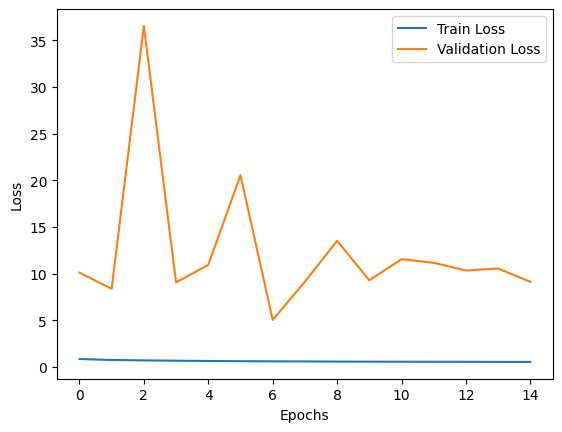

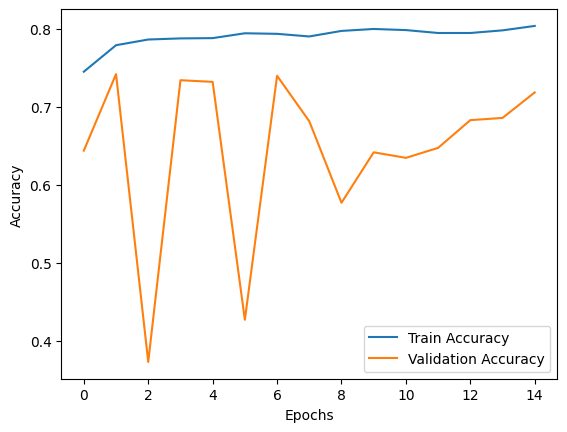

In [95]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [96]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7438 - loss: 4.9489
Test Accuracy: 0.7395


Model Evaluation & Interpretation

In [97]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix

# Predict on test set
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary output

# Accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy:.4f}')

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_binary))

# ROC-AUC Score
auc_score = roc_auc_score(y_test, y_pred)
print(f'ROC-AUC Score: {auc_score:.4f}')


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Accuracy: 0.7395
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.76      0.81      1035
           1       0.51      0.69      0.58       374

    accuracy                           0.74      1409
   macro avg       0.69      0.72      0.70      1409
weighted avg       0.77      0.74      0.75      1409

ROC-AUC Score: 0.7880


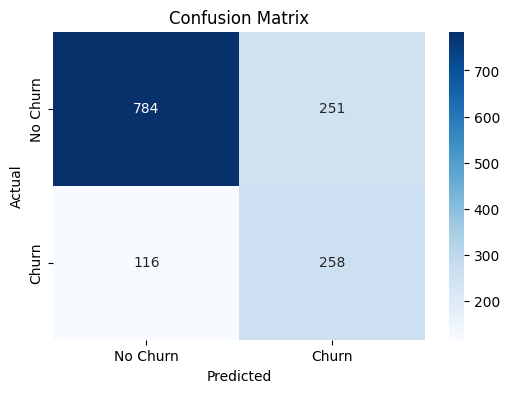

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_binary)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


PermutationExplainer explainer: 1410it [05:07,  4.58it/s]


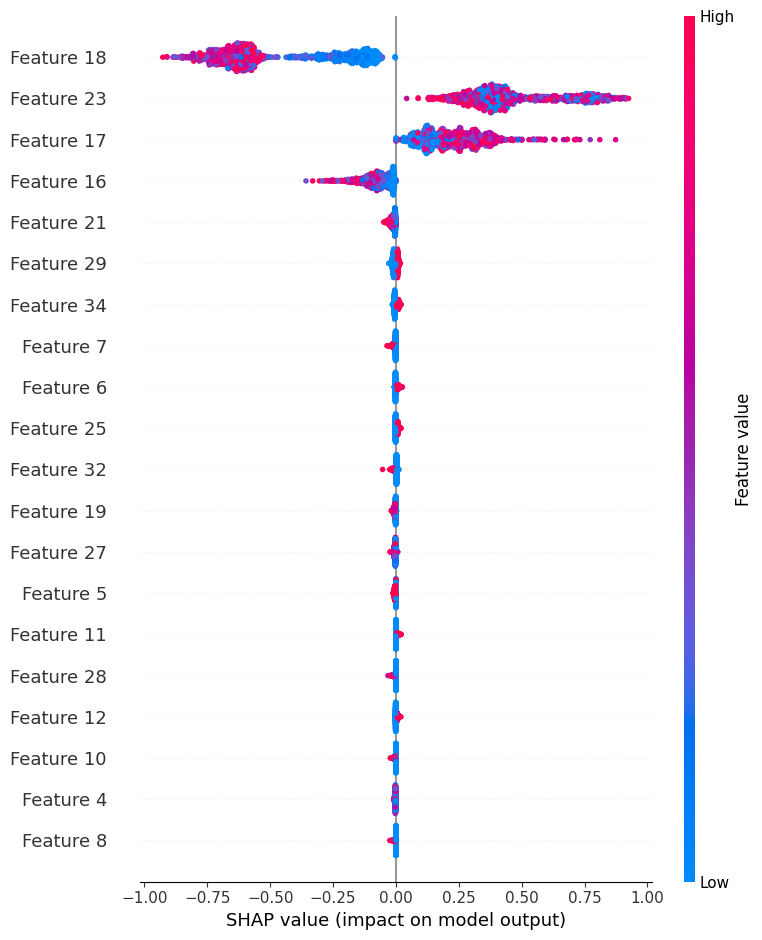

In [99]:
import shap

explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Summary plot for feature importance
shap.summary_plot(shap_values, X_test)


In [101]:
import joblib

# Save model
joblib.dump(model, 'customer_churn_model.pkl')


['customer_churn_model.pkl']

In [103]:
import pandas as pd

# Convert X_test to a DataFrame if it's a NumPy array
if isinstance(X_test, np.ndarray):
    X_test = pd.DataFrame(X_test)

# Now iloc will work correctly
sample_input = X_test.iloc[0:1]
predicted_churn = loaded_model.predict(sample_input)
print("Predicted Churn Probability:", predicted_churn)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step
Predicted Churn Probability: [[2.3444856e-15]]


In [104]:
import numpy as np
import pandas as pd

# Check class distribution
print("Class Distribution in Training Data:")
print(np.bincount(y_train))  # If y_train is NumPy array
# OR
# print(y_train.value_counts())  # If y_train is Pandas DataFrame

# Test with a sample input
sample_input = X_test[0:1]  # Assuming X_test is a NumPy array

# Ensure the model gives probabilities
predicted_prob = loaded_model.predict(sample_input)

# Display probability and binary classification output
print("Predicted Churn Probability:", predicted_prob)
print("Binary Prediction:", (predicted_prob > 0.5).astype(int))

# Check for feature scaling consistency
print("Training Data Mean:", np.mean(X_train, axis=0))
print("Test Data Mean:", np.mean(X_test, axis=0))


Class Distribution in Training Data:
[4139 1495]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
Predicted Churn Probability: [[2.3444856e-15]]
Binary Prediction: [[0]]
Training Data Mean: [-4.28797533e-17  1.76563690e-17  8.82818451e-18  5.54914455e-17
  1.13505229e-17 -2.00210613e-17  6.30584608e-18  2.64845535e-17
  7.56701529e-18 -3.53127380e-17  2.52233843e-17  4.16185841e-17
 -3.78350765e-17  3.94115380e-17 -2.14398767e-17 -2.39622151e-17
 -1.26116922e-17 -1.00893537e-17  1.51340306e-17 -1.26116922e-17
 -2.33316305e-17 -1.26116922e-17  3.78350765e-18  1.70257844e-17
  0.00000000e+00  3.53127380e-17  3.94115380e-17  0.00000000e+00
  5.04467686e-18 -4.28797533e-17  5.76984916e-17 -4.54020917e-17
  4.76091379e-17 -4.28797533e-17 -3.27903996e-17 -2.01787074e-17]
Test Data Mean: 0       0.512420
1       0.157559
2       0.477644
3       0.305891
4       0.435460
5       0.912704
6       0.911994
7       0.783534
8       0.861604
9       0.894251
10      0.782115
11      0.949610
12      0.9723

In [105]:
import pandas as pd

# Convert X_test to a DataFrame if it's a NumPy array
if isinstance(X_test, np.ndarray):
    X_test = pd.DataFrame(X_test)

# Now iloc will work correctly
sample_input = X_test.iloc[0:1]
predicted_churn = loaded_model.predict(sample_input)
print("Predicted Churn Probability:", predicted_churn)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Predicted Churn Probability: [[2.3444856e-15]]


In [106]:
from flask import Flask, request, jsonify
import joblib
import pandas as pd

app = Flask(__name__)

# Load model
model = joblib.load('customer_churn_model.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json  # Get JSON input
    input_data = pd.DataFrame([data])  # Convert to DataFrame
    prediction = model.predict(input_data)[0]  # Get prediction
    return jsonify({'churn_probability': float(prediction)})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
